# ARIMA
Data : sahampoo sales.csv
- Identified data pattern
- Build ACF and PACF plot until second differencing
- Identified the most suitable model based on ACF and PACF plot
- Build ARIMA(2, 1 , 0) model
- Forecast for 6 periods ahead

> ## Library

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go

from statsmodels.tsa.arima_model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

> ## Data

In [4]:
df_shampoo = pd.read_csv(r'C:\Users\user\Documents\Data Science\MODUL 3\10. Time Series Forecasting\shampo sales.csv')

In [5]:
df_shampoo.head()

,Month,Sales
0,1-01,266.0
1,1-02,145.9
2,1-03,183.1
3,1-04,119.3
4,1-05,180.3


In [6]:
df_shampoo.tail()

,Month,Sales
31,3-08,407.6
32,3-09,682.0
33,3-10,475.3
34,3-11,581.3
35,3-12,646.9


> ## EDA

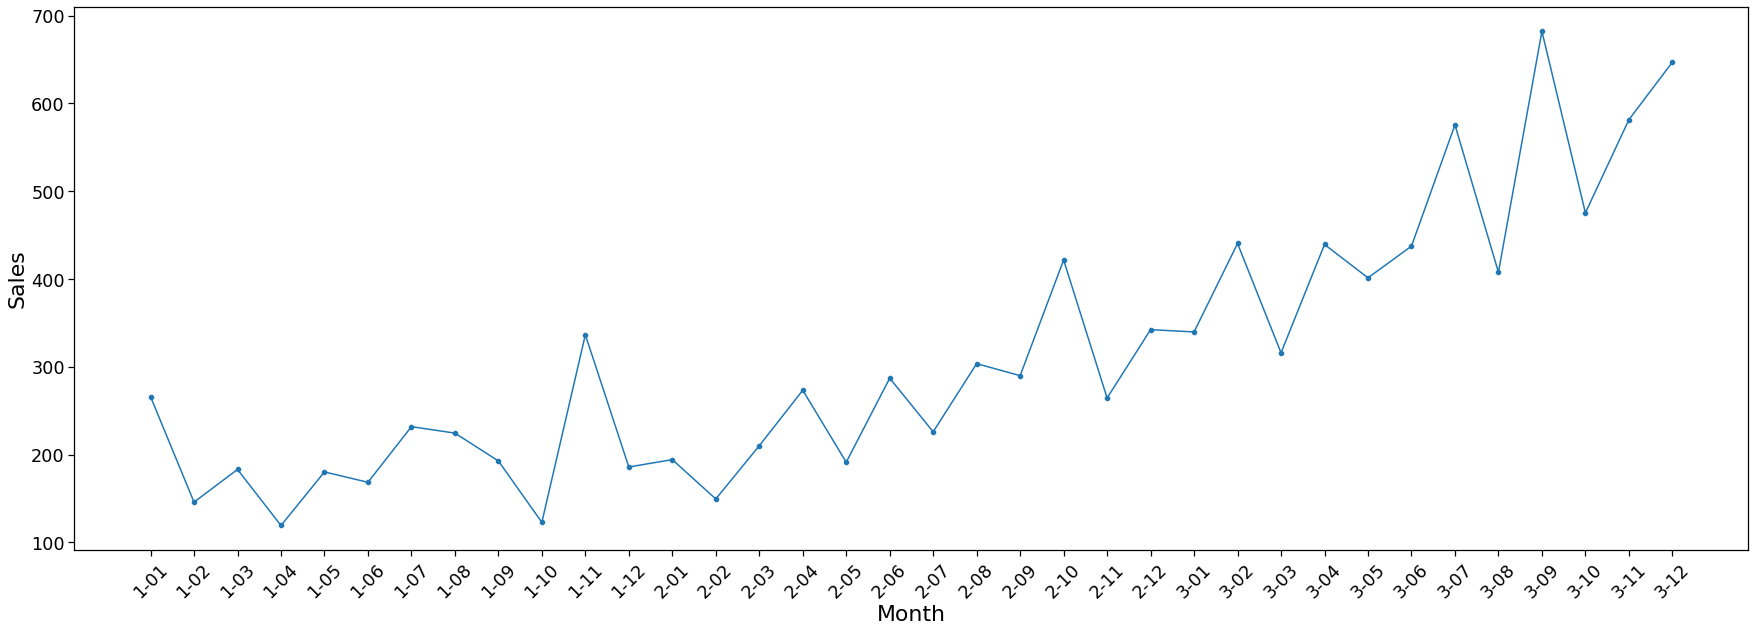

In [13]:
plt.figure(figsize = (30,10))

sns.set_context(context = 'notebook', font_scale=1.6)

sns.scatterplot(x = 'Month' , y = 'Sales', data = df_shampoo)
sns.lineplot(x = 'Month', y = 'Sales', data = df_shampoo)
plt.xlabel('Month', fontsize = 22)
plt.ylabel('Sales', fontsize = 22)
plt.xticks(rotation=45)

plt.show()

> ## ACF - PACF
1. original data
2. data differencing 1
3. data differencing 2

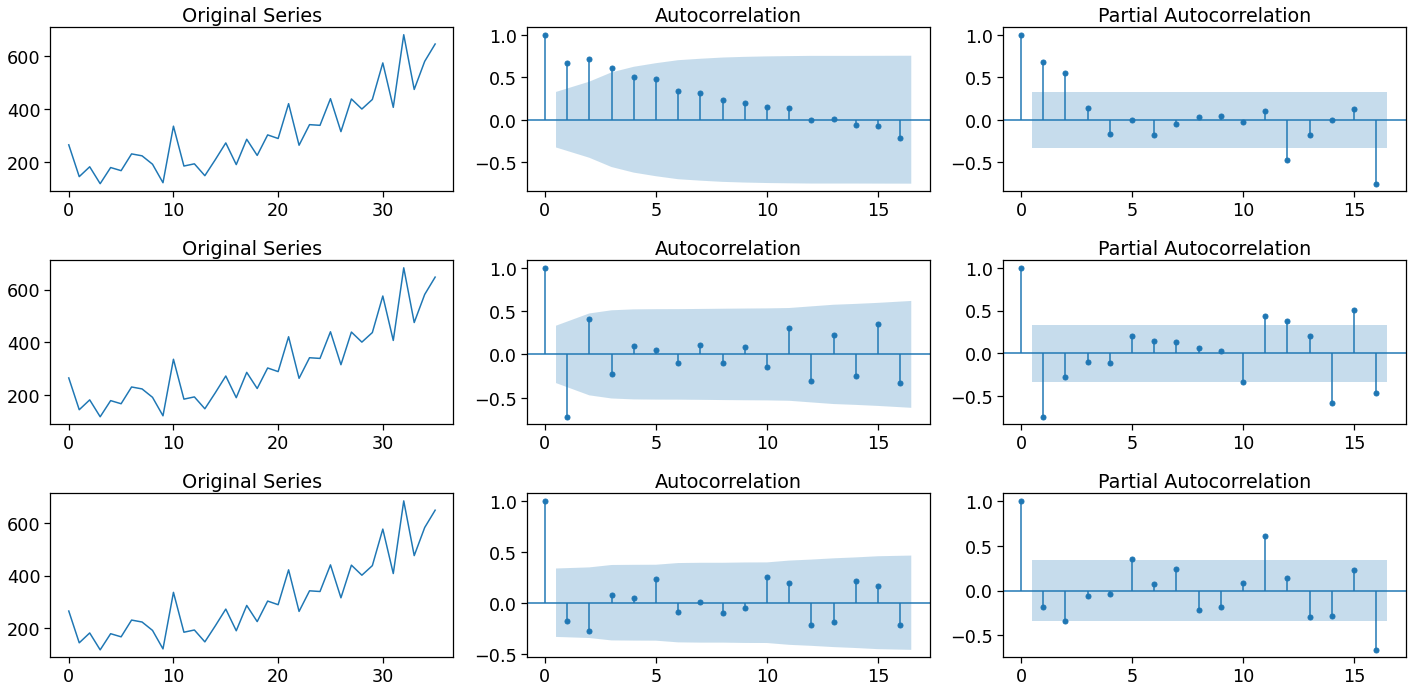

In [20]:
fig, axes = plt.subplots(3, 3, figsize = (20,10))

# Original Series
axes[0, 0].plot(df_shampoo['Sales']); axes[0, 0].set_title('Original Series')
plot_acf(df_shampoo['Sales'], ax=axes[0, 1])
plot_pacf(df_shampoo['Sales'], ax=axes[0, 2])

# first order differencing
axes[1, 0].plot(df_shampoo['Sales']); axes[1, 0].set_title('Original Series')
plot_acf(df_shampoo['Sales'].diff().dropna(), ax=axes[1, 1])
plot_pacf(df_shampoo['Sales'].diff().dropna(), ax=axes[1, 2])

# second order differencing
axes[2, 0].plot(df_shampoo['Sales']); axes[2, 0].set_title('Original Series')
plot_acf(df_shampoo['Sales'].diff(2).dropna(), ax=axes[2, 1])
plot_pacf(df_shampoo['Sales'].diff(2).dropna(), ax=axes[2, 2])

plt.tight_layout()
plt.show()

1. Check data stationary or not stationary
    - If stationary : use for modeling
    - If not stationary : use differencing data for modeling
2. Stationary in first order differencing
3. ACF - PACF:
    - ACF - cut off lag 2
    - PACF - cut off lag 2
4. Model candidate : 
    - ARIMA (2,1,0)
    - ARIMA(0, 1 ,2)

> ## Modeling

In [21]:
model = ARIMA(df_shampoo['Sales'], order = (2, 1, 0))
model_fit = model.fit()

C:\Users\user\Anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


In [23]:
print(model_fit.summary())

                             ARIMA Model Results                              
Dep. Variable:                D.Sales   No. Observations:                   35
Model:                 ARIMA(2, 1, 0)   Log Likelihood                -197.814
Method:                       css-mle   S.D. of innovations             67.833
Date:                Fri, 03 Sep 2021   AIC                            403.628
Time:                        17:47:45   BIC                            409.849
Sample:                             1   HQIC                           405.775
                                                                              
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const            11.6504      4.907      2.374      0.018       2.034      21.267
ar.L1.D.Sales    -1.0223      0.167     -6.109      0.000      -1.350      -0.694
ar.L2.D.Sales    -0.3655      0.167     

> ## Forecasting

In [25]:
forecast_length = 6
forecast_result = model_fit.forecast(forecast_length)

In [35]:
print('Forecasted result : \n', forecast_result[0])

Forecasted result : 
 [568.90813526 652.48152883 623.37076833 650.40184488 661.22788764
 668.09884946]


In [34]:
print('Forecasted standard error : \n', forecast_result[1])

Forecasted standard error : 
 [67.83250476 67.849407   81.18745077 84.32960375 88.92625695 94.05873115]


In [33]:
print('Forecasted confidence interval : \n', forecast_result[2])

Forecasted confidence interval : 
 [[435.95886895 701.85740158]
 [519.49913475 785.46392292]
 [464.24628883 782.49524783]
 [485.1188587  815.68483105]
 [486.93562674 835.52014854]
 [483.74712399 852.45057494]]


In [38]:
Month = []

for i in range(1, forecast_length+1):
    Month.append('4-'+str(i))

In [39]:
df_forecast = pd.DataFrame({
    'Month': Month,
    'Sales': forecast_result[0]
})
df_forecast

,Month,Sales
0,4-1,568.908135
1,4-2,652.481529
2,4-3,623.370768
3,4-4,650.401845
4,4-5,661.227888
5,4-6,668.098849


In [46]:
df_forecast = df_shampoo[-1:].append(df_forecast)

In [41]:
df_forecast2 = pd.DataFrame({
    'Month': Month,
    'Sales': forecast_result[0],
    'se': forecast_result[1],
    'lower': forecast_result[2][:, 0],
    'upper': forecast_result[2][:, 1]
})
df_forecast2

,Month,Sales,se,lower,upper
0,4-1,568.908135,67.832505,435.958869,701.857402
1,4-2,652.481529,67.849407,519.499135,785.463923
2,4-3,623.370768,81.187451,464.246289,782.495248
3,4-4,650.401845,84.329604,485.118859,815.684831
4,4-5,661.227888,88.926257,486.935627,835.520149
5,4-6,668.098849,94.058731,483.747124,852.450575


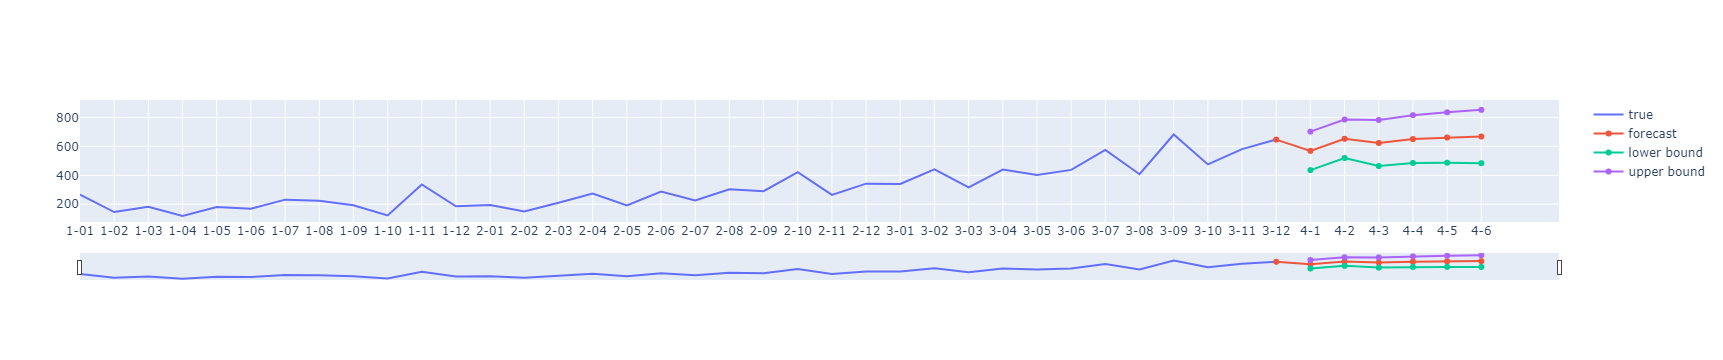

In [47]:
fig = go.Figure([go.Scatter(name = 'true',x=df_shampoo['Month'], y=df_shampoo['Sales'])])
fig.add_trace(go.Scatter(name = 'forecast',x=df_forecast['Month'], y=df_forecast['Sales']))
fig.add_trace(go.Scatter(name = 'lower bound',x=df_forecast2['Month'], y=df_forecast2['lower']))
fig.add_trace(go.Scatter(name = 'upper bound',x=df_forecast2['Month'], y=df_forecast2['upper']))
fig.update_xaxes(rangeslider_visible=True)
fig.show()